<a href="https://colab.research.google.com/github/selvisahrena/selvi/blob/main/Decisision_Tree_Selvi_Sahrena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install scikit-learn** bagi yang belum instalasi

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

Memanggil semua package yang akan digunakan

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn.tree as tree

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving teleCust1000t.csv to teleCust1000t.csv


Load data set, dengan cara upload terlebih dahulu ke drive google collab

In [ ]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,daerah,masa_jabatan,umur,perkawinan,alamat,income,pendidikan,pekerjaan,pensiun,jk,tinggal,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


**Lakukan visualisasi data terlebih dahulu untuk mengeksplorasi data**

In [ ]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


Membuat histogram beberapa variabel bebas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   daerah        1000 non-null   int64
 1   masa_jabatan  1000 non-null   int64
 2   umur          1000 non-null   int64
 3   perkawinan    1000 non-null   int64
 4   alamat        1000 non-null   int64
 5   income        1000 non-null   int64
 6   pendidikan    1000 non-null   int64
 7   pekerjaan     1000 non-null   int64
 8   pensiun       1000 non-null   int64
 9   jk            1000 non-null   int64
 10  tinggal       1000 non-null   int64
 11  custcat       1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

Bar Chart Masa jabatan

In [ ]:
# Tabulasi data
tabulasi_masa_jabatan = df['masa_jabatan'].value_counts().reset_index()
tabulasi_masa_jabatan.columns = ['Kategori', 'Jumlah']  # Menamai kolom
print(tabulasi_masa_jabatan)

    Kategori  Jumlah
0         72      31
1         48      20
2         24      20
3          3      20
4         13      19
..       ...     ...
67        47       7
68        36       7
69         2       7
70        21       6
71        63       6

[72 rows x 2 columns]


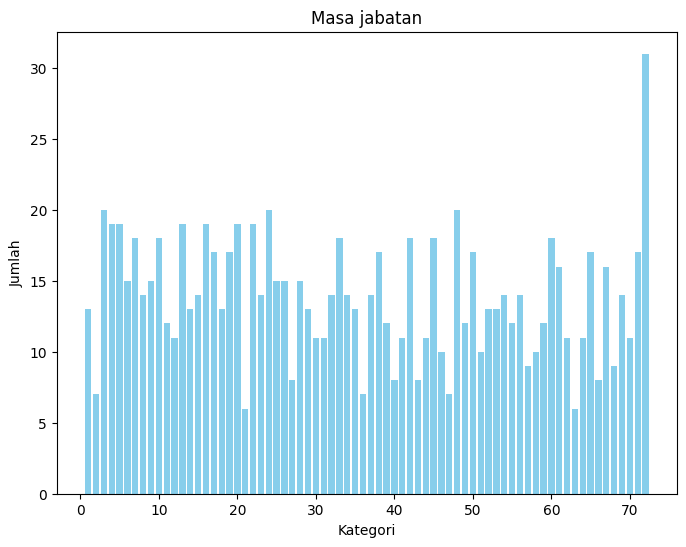

In [ ]:
# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
plt.bar(tabulasi_masa_jabatan['Kategori'], tabulasi_masa_jabatan['Jumlah'], color='skyblue')  # Membuat bar chart
plt.xlabel('Kategori')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Masa jabatan')  # Judul
plt.show()  # Menampilkan grafik

Bar Chart Custcat

In [ ]:
# Tabulasi data
tabulasi_custcat = df['custcat'].value_counts().reset_index()
tabulasi_custcat.columns = ['Kategori', 'Jumlah']  # Menamai kolom
print(tabulasi_custcat)

   Kategori  Jumlah
0         3     281
1         1     266
2         4     236
3         2     217


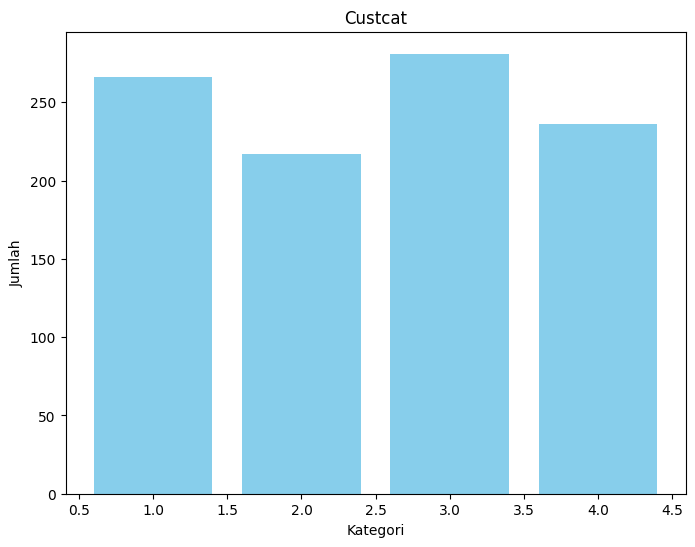

In [ ]:
# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
plt.bar(tabulasi_custcat['Kategori'], tabulasi_custcat['Jumlah'], color='skyblue')  # Membuat bar chart
plt.xlabel('Kategori')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Custcat')  # Judul
plt.show()  # Menampilkan grafik

**Persiapan Data**

*   Membuat kelompok Feature atau variabel bebas tersendiri
*   Membuat kelompok labels atau variabel terikat tersendiri



In [ ]:
df.columns

Index(['daerah', 'masa_jabatan', 'umur', 'perkawinan', 'alamat', 'income',
       'pendidikan', 'pekerjaan', 'pensiun', 'jk', 'tinggal', 'custcat'],
      dtype='object')

In [ ]:
X = df[['daerah', 'masa_jabatan', 'umur', 'perkawinan', 'alamat', 'income',
       'pendidikan', 'pekerjaan', 'pensiun', 'jk', 'tinggal', 'custcat']] .values  #.astype(float)
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   4,   5,   0,   0,   2,   1],
       [  3,  11,  33,   1,   7, 136,   5,   5,   0,   0,   6,   4],
       [  3,  68,  52,   1,  24, 116,   1,  29,   0,   1,   2,   3],
       [  2,  33,  33,   0,  12,  33,   2,   0,   0,   1,   1,   1],
       [  2,  23,  30,   1,   9,  30,   1,   2,   0,   0,   4,   3]])

In [ ]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

**Membagi data menjadi data training dan testing**

proporsi sebesar 30% data testing, dan 70% data training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_tes.shape,  y_tes.shape)

Train set: (700, 12) (700,)
Test set: (300, 12) (300,)


In [ ]:
y_tes

array([3, 3, 1, 4, 1, 4, 3, 1, 1, 3, 4, 4, 4, 1, 4, 3, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 1, 4, 1, 3, 4, 2, 1, 2, 2, 3, 3, 3, 1, 4, 1, 2, 1, 4, 2,
       1, 3, 4, 1, 4, 1, 3, 4, 4, 2, 4, 1, 4, 3, 4, 1, 1, 1, 3, 1, 1, 3,
       4, 2, 3, 3, 4, 4, 3, 3, 2, 3, 2, 2, 3, 2, 1, 4, 2, 2, 1, 3, 2, 3,
       3, 3, 1, 2, 1, 3, 1, 1, 3, 1, 4, 4, 2, 1, 1, 3, 1, 2, 2, 2, 2, 1,
       3, 2, 2, 1, 4, 3, 3, 4, 4, 3, 2, 1, 2, 1, 4, 3, 3, 1, 1, 1, 4, 4,
       3, 2, 3, 1, 4, 1, 1, 3, 4, 2, 4, 2, 3, 4, 3, 3, 2, 4, 3, 1, 4, 4,
       3, 3, 3, 1, 4, 4, 4, 2, 1, 1, 3, 2, 4, 1, 3, 3, 3, 2, 3, 4, 3, 2,
       2, 4, 1, 3, 3, 3, 4, 2, 3, 4, 3, 1, 2, 2, 1, 1, 4, 4, 3, 2, 3, 1,
       3, 4, 3, 2, 4, 4, 2, 1, 3, 2, 1, 3, 3, 2, 3, 3, 2, 1, 1, 4, 3, 4,
       2, 2, 2, 1, 4, 1, 2, 2, 2, 2, 3, 4, 3, 2, 2, 1, 3, 1, 3, 3, 1, 4,
       1, 3, 4, 4, 2, 2, 3, 4, 4, 2, 4, 3, 3, 3, 1, 1, 4, 4, 4, 2, 3, 4,
       3, 2, 3, 4, 1, 3, 1, 4, 4, 2, 3, 2, 3, 1, 1, 4, 1, 3, 3, 1, 2, 4,
       1, 3, 4, 3, 2, 3, 3, 4, 2, 3, 1, 1, 4, 1])

**Klasifikasi Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**1. Training atau melatih model**

We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [ ]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**2. Prediksi data testing**

In [ ]:
predTree = model_dt.predict(X_tes)
predTree[0:5]

array([3, 3, 1, 4, 1])

In [ ]:
print (predTree[0:5])
print (y_tes[0:5])

[3 3 1 4 1]
[3 3 1 4 1]


**3. Evaluasi Akurasi Model**

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_tes, predTree))

DecisionTrees's Accuracy:  1.0
